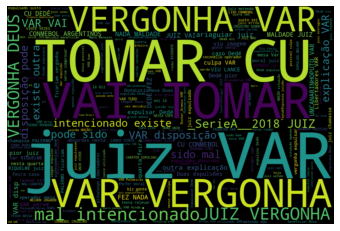

In [84]:
#importanto coisas importantes
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter
import csv

# le stopwords de um arquivo
stopwords =  open("stopwords-br.txt","r").read()

# armazena o texto dos tweets
twts = []

#cria uma lista para armazenar links
links_list = []

# CSV com tweets que será lido
filename = "tcat_WC2018_VAR_2terms-20180919-20180920-libertadores_OR_conmebol_OR_juiz-Bolvar_AND_Bolivar-----pt----fullExport--09e31a9f9d.csv"
file = open(filename, "r", encoding="utf8")

# get the ttweets text and add to list
for line in csv.reader(file):
    
    text = line[4]
    twts.append(text)


# itera pelos tweets na planilha
for tweet in twts:
    
    # ignora links de retweets
    if tweet[:2] != "RT":
        
        # busca por urls
        urls = re.search("(?P<url>https?://[^\s'\"]+)", tweet)
        
        #se houver uma url adiciona ela a lista de links
        if urls is not None:
            #print(urls[0])
            links_list.append(urls[0])
            
# Tally occurrences of words in a list
contador = Counter()
for url in links_list:
    contador[url] += 1

with open('links.csv', 'w') as links:
    escritor = csv.writer(links, lineterminator = '\n')
    for i in contador:
        escritor.writerow([i, contador[i]])


# string usada na remoção dos links
string = ''


#coloca os tweets na lista
for tweet in twts:

    #original
    tweetsemlink = re.sub(r"http\S+", "", str(tweet))#remove links de tweets
    #print(tweetsemlink)

    string += str(tweetsemlink + '\n')
    #print(string)

#transforma uma str com vários tweets em lista de palavras
palavras_dos_tweets = re.sub("[^\w]", " ",  string).split()


# faz uma copia da lista de palavras que será filtrada depois
lista_filtrada = palavras_dos_tweets[:]


# salva todas as palavras em um txt (pq sim...)
with open("output.txt", "w") as output:
    for palavra in palavras_dos_tweets:
        output.write(palavra + '\n')

# remove as stopwords da lista_filtrada
for palavra in palavras_dos_tweets:
    if palavra.lower() in stopwords:
        lista_filtrada.remove(palavra)


#junta tudo em uma string para montar uma lista de palavras
string_final = ' '.join(lista_filtrada)


#faz a nuvem de palavras  
wordcloud = WordCloud( width=1200, height=800).generate(string_final) #max_font_size=32,
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("nuvem.pdf")

#fecha os arquivos
file.close()
#output.close()

